In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


Load data

In [2]:
os.chdir('../../../Rat-Pilot/data/tag_directories/')

In [3]:
norm_exp = pd.read_csv('all_peaks.rlog.txt',sep='\t')
colnames = {norm_exp.columns[0]:'PeakID'}
for col in norm_exp.columns[19:]:
    colnames[col] = col.split()[0]
norm_exp = norm_exp.rename(colnames,axis=1)
norm_exp = norm_exp[['PeakID','Chr','Start','End','Annotation']+list(norm_exp.columns[19:])]
norm_exp['Annotation'] = norm_exp.apply(lambda x: x[4].split()[0].lower(),axis=1)
norm_exp.head()

,PeakID,Chr,Start,End,Annotation,H3K27ac1-IL,H3K27ac2-PL,H3K27ac4-ST,H3K27ac5-AC,H3K27ac6-AS,H3K27ac7-VTA
0,Merged-chr4-77447614-7,chr4,77446325,77448719,intergenic,11.486580,11.592882,11.369450,11.455429,11.541023,11.206650
1,Merged-chr12-13804183-10,chr12,13798571,13812426,intergenic,10.518769,10.435693,10.974241,10.252431,10.399940,10.374023
2,Merged-chr12-38873382-8,chr12,38869851,38879308,intergenic,9.811939,9.805325,10.217660,9.469130,9.758923,9.933961
3,Merged-chr4-58505254-7,chr4,58501851,58509994,intergenic,9.317609,9.653931,10.054095,9.315937,9.290063,9.478464
4,Merged-chr6-110903817-6,chr6,110901168,110906468,exon,9.280835,9.398107,9.625998,8.983863,9.111870,9.107477


Limit to distal enhancers (intergenic and intron annotations for first pass)

In [4]:
norm_exp = norm_exp[norm_exp.Annotation.isin(['intergenic','intron'])]
norm_exp.head()

,PeakID,Chr,Start,End,Annotation,H3K27ac1-IL,H3K27ac2-PL,H3K27ac4-ST,H3K27ac5-AC,H3K27ac6-AS,H3K27ac7-VTA
0,Merged-chr4-77447614-7,chr4,77446325,77448719,intergenic,11.486580,11.592882,11.369450,11.455429,11.541023,11.206650
1,Merged-chr12-13804183-10,chr12,13798571,13812426,intergenic,10.518769,10.435693,10.974241,10.252431,10.399940,10.374023
2,Merged-chr12-38873382-8,chr12,38869851,38879308,intergenic,9.811939,9.805325,10.217660,9.469130,9.758923,9.933961
3,Merged-chr4-58505254-7,chr4,58501851,58509994,intergenic,9.317609,9.653931,10.054095,9.315937,9.290063,9.478464
5,Merged-chr10-37314029-6,chr10,37311085,37317544,intergenic,9.100498,9.177305,9.639574,8.882499,9.036331,9.487353


In [5]:
del norm_exp['Annotation']

Perform PCA

In [6]:
pca = PCA(n_components=2)

In [7]:
principal_components = pca.fit_transform(norm_exp[norm_exp.columns[4:]].T)

In [8]:
principal_df = pd.DataFrame(data=principal_components,columns=['PC 1','PC 2'])
principal_df['Sample'] = norm_exp[norm_exp.columns[4:]].T.index
principal_df.head()

,PC 1,PC 2,Sample
0,-22.716903,-57.416002,H3K27ac1-IL
1,-21.117974,-56.855893,H3K27ac2-PL
2,145.812157,69.924212,H3K27ac4-ST
3,10.084732,-31.026163,H3K27ac5-AC
4,-4.411107,-41.397230,H3K27ac6-AS


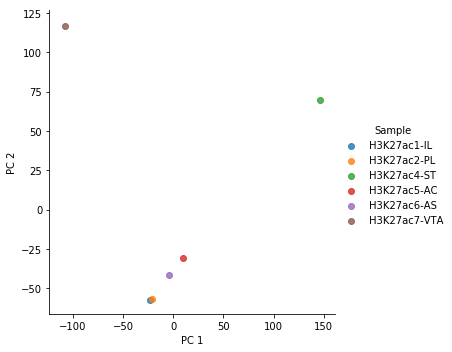

In [9]:
sns.lmplot(x='PC 1',y='PC 2',data=principal_df,hue='Sample',fit_reg=False)

In [10]:
pca.explained_variance_ratio_

array([0.3865912 , 0.31592578])